In [1]:
# import necessary packages
import pandas as pd
from numpy import log
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train_y = df_train['label']
df_train_x = df_train.drop('label', axis=1)

In [ ]:
df_train_x.iloc[0].shape

(784,)

Correct number: 1


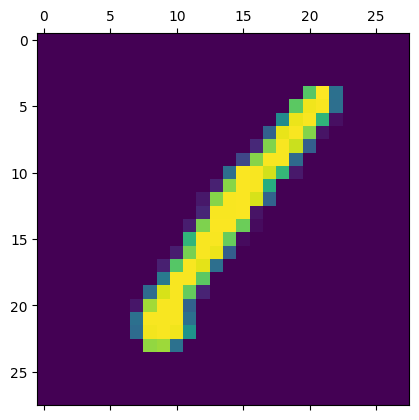

In [ ]:
plt.matshow(df_train_x.iloc[0].values.reshape(28,28))
print('Correct number: {}'.format(df_train_y.iloc[0]))

Correct number: 8


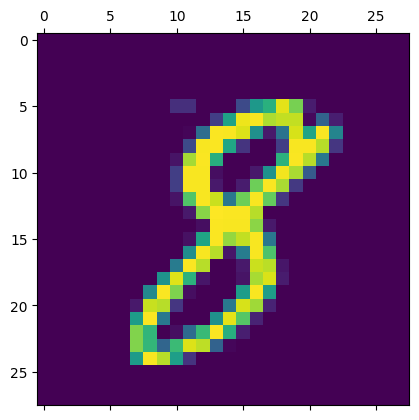

In [ ]:
plt.matshow(df_train_x.iloc[20].values.reshape(28,28))
print('Correct number: {}'.format(df_train_y.iloc[20]))

In [ ]:
df_train_x.shape

(42000, 784)

In [ ]:
df_train_x.max().max()

255

In [ ]:
df_train_x = df_train_x / 255
df_test = df_test / 255

In [ ]:
df_train_x.max().max()

1.0

In [ ]:
!pip install scikit-learn

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(50, 10))
clf.fit(df_train_x, df_train_y)

MLPClassifier(hidden_layer_sizes=(50, 10))

In [ ]:
train_result = clf.predict_proba(df_train_x)

In [ ]:
def logloss(df_pred, df_correct):
    log_los = 0
    for i, index in enumerate(df_correct.values):
        log_los += -log(df_pred[i, index])
    log_los /= len(df_correct)
    return log_los

In [ ]:
loglos_train = logloss(train_result, df_train_y)
print('Train loglos: {}'.format(loglos_train))

Train loglos: 0.0007477004285218813


In [ ]:
result = clf.predict(df_test)

Predict number: 2


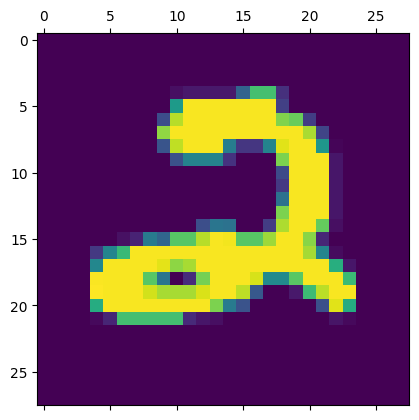

In [ ]:
plt.matshow(df_test.iloc[0].values.reshape(28,28))
print('Predict number: {}'.format(result[0]))

Predict number: 9


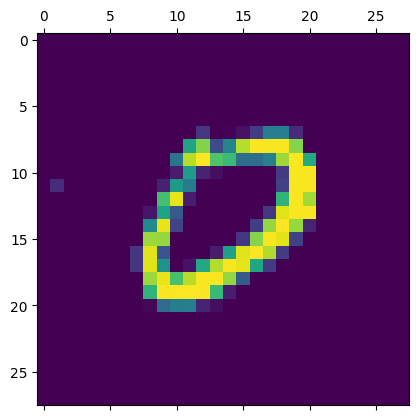

In [ ]:
plt.matshow(df_test.iloc[3].values.reshape(28,28))
print('Predict number: {}'.format(result[3]))

<Axes: ylabel='Frequency'>

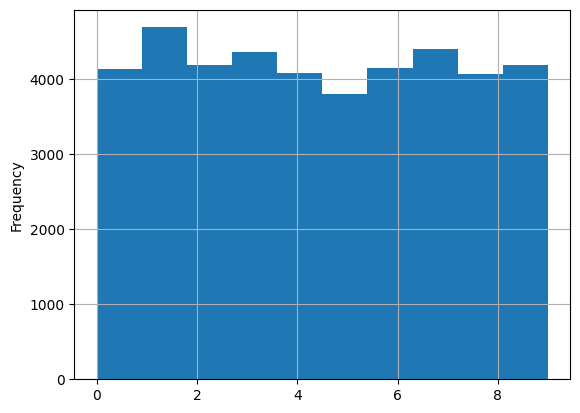

In [ ]:
df_train_y.plot.hist(grid=True,bins=10)

<Axes: ylabel='Frequency'>

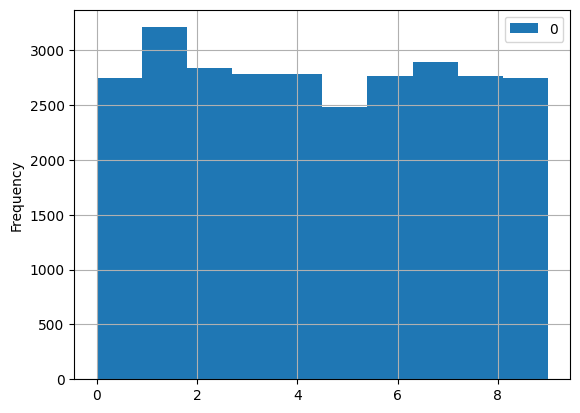

In [ ]:
pd.DataFrame(result).plot.hist(grid=True,bins=10)